# Visualizing Networks

The data we'll be working with today is about cities in America, the nodes have information about the cities location and population. The edges are the connections of travel between the cities, with the weights being the cost of travel.

In [1]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt

# read in the graph 
G = nx.read_gpickle('major_us_cities')

<IPython.core.display.Javascript object>


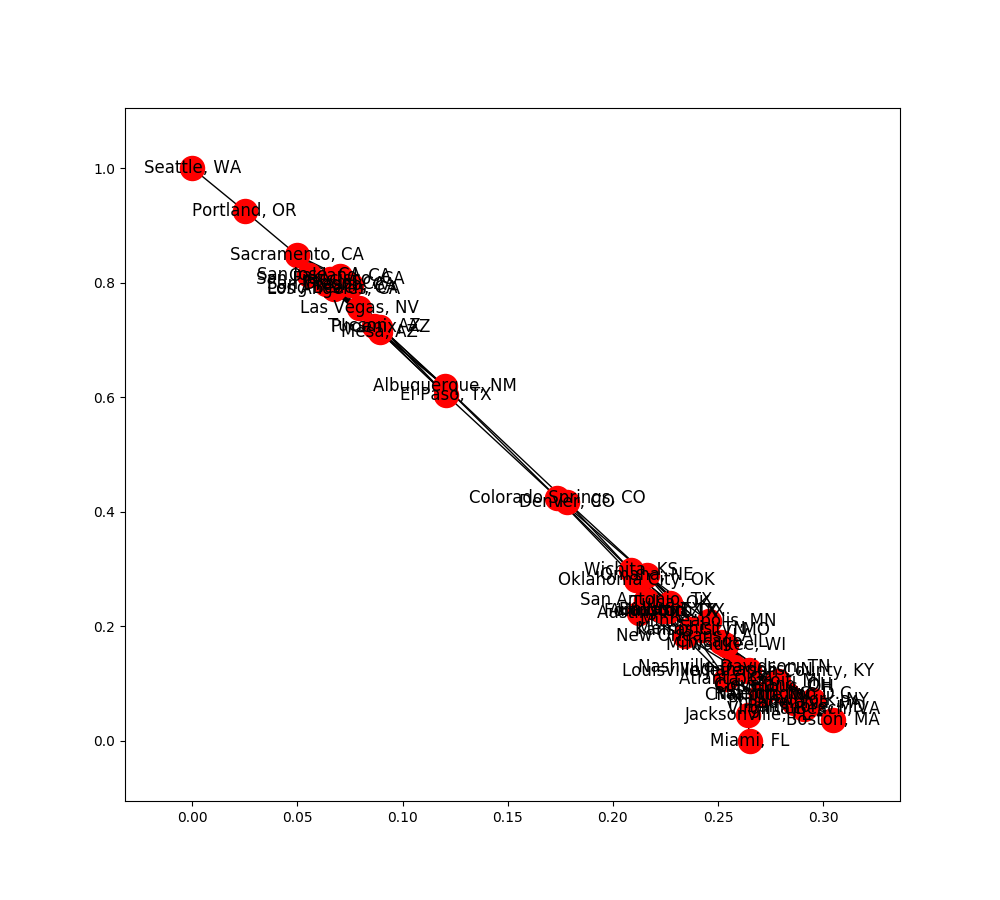

In [2]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
# nx.draw_networkx() has a default value of spring_layout which tries to position
# nodes with as few crossing edges as possible, while keeping edge lengths similar.
nx.draw_networkx(G)

In [3]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['circular_layout',
 'random_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

<IPython.core.display.Javascript object>


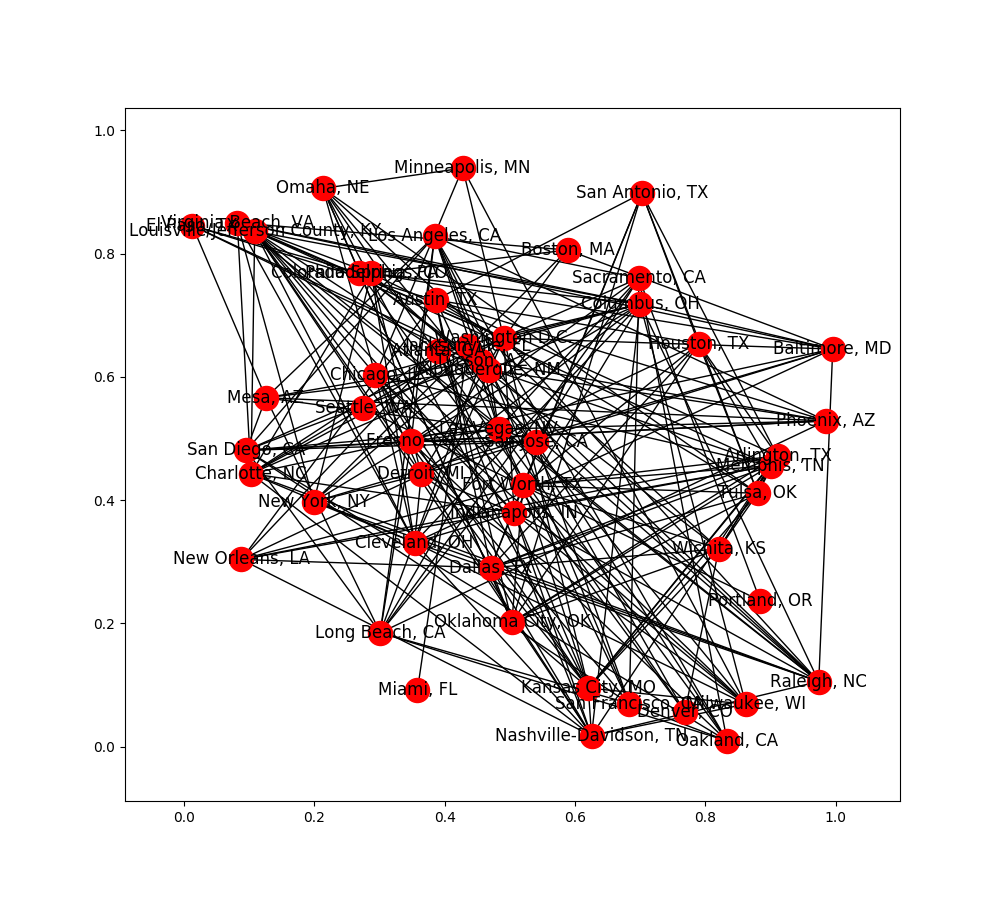

In [4]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


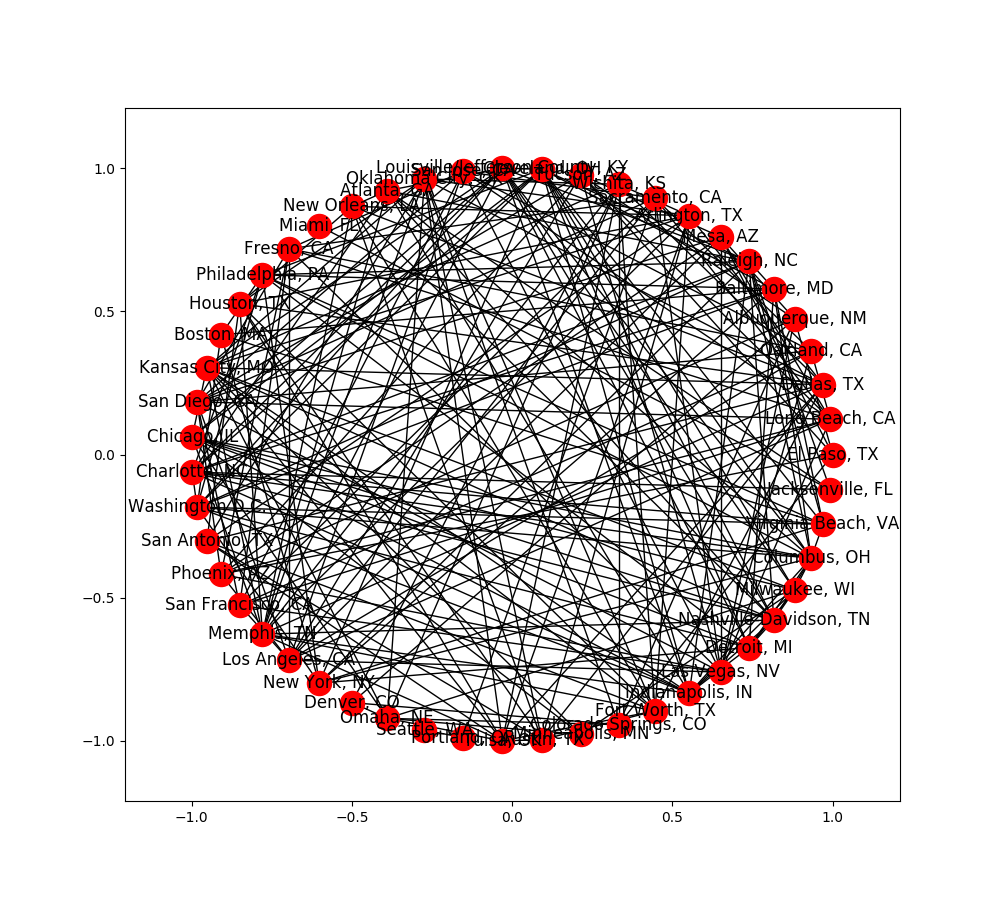

In [5]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


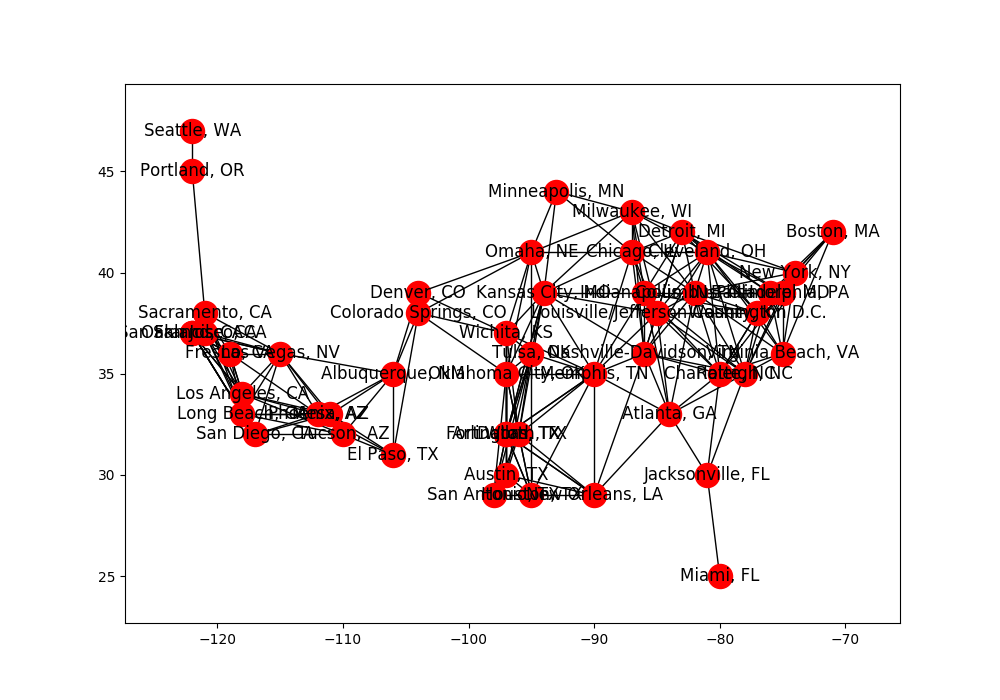

In [6]:
# Draw the graph using custom node positions
# This is passed in as a dictionary of node positions
plt.figure(figsize=(10,7))
# as our nodes have location as an atribute we can use this
pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


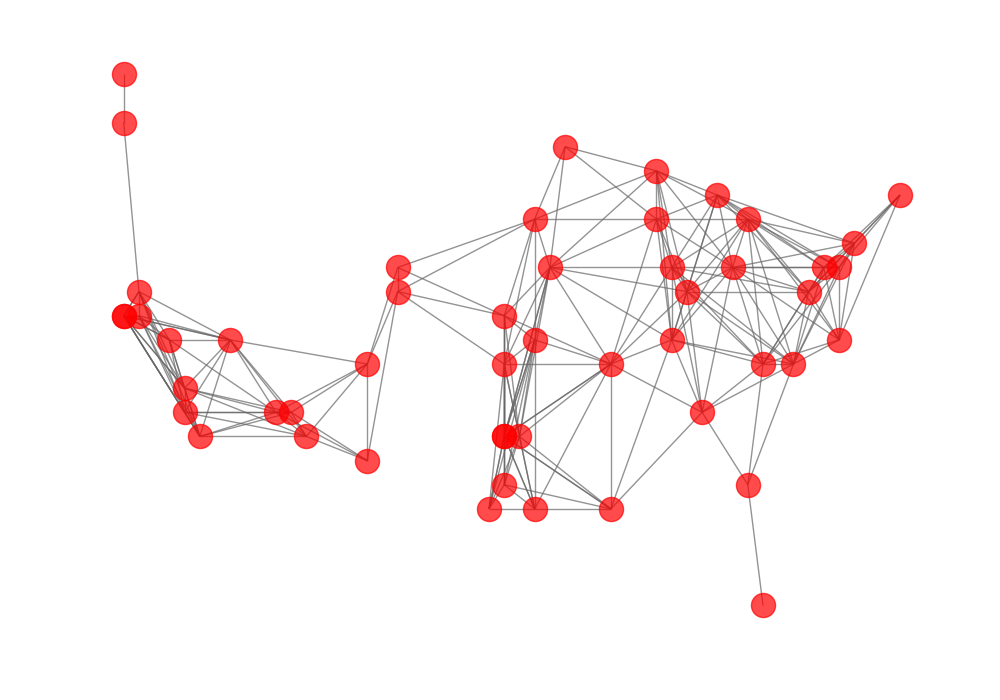

In [7]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


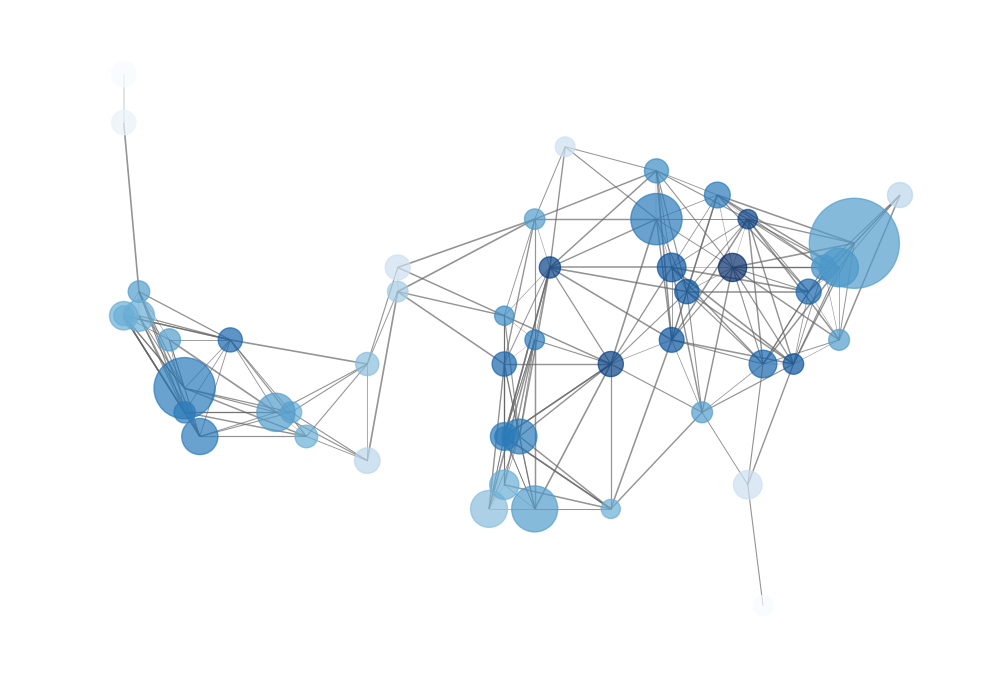

In [13]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))
# We're setting the node colour based on the degree of the node
# where the degree is the number of node connections
node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


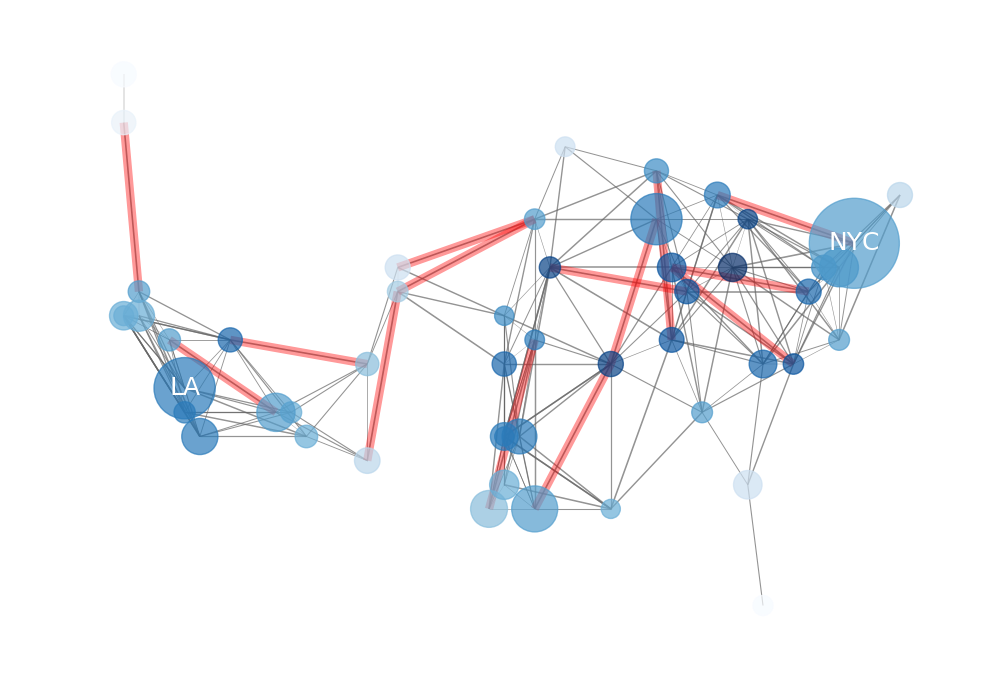

In [9]:
# suppose we want to indentify the most expensive edges in our network
# where the cost is greater than 770
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

# if edge is greater than 770 then the edge will be red
greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();